In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

In [10]:
data = pd.read_csv("../../Data/DHS Prediction/health_data.csv")

# Data Resize



* Age 13
    * categories 1 - 13; where 1 is 18-24, 9 is 60-64, 13 is 80+
* Sex
    * 0:Female 1:Male
* HighChol
    * 1: True
* CholCheck in 5 years bool
* BMI
* Smoker smoked > 5packs bool
* HeartDiseaseorAttack
    * 0:CHD 1:Myocardial Infarction
* PhysActivity past 30 days bool
* Fruits Consume regularrly bool
* Veggies Consume regularrly bool
* HvyAlcoholConsump bool
* GenHlth
    * Self reported health scale 1 excellent - 5 poor
* MentHlth
    * Days of poor mental health past 30 days
* PhysHlth
    * illness or injury count in past 30 days
* DiffWalk bool
    * difficulty walking/climbing stairs
<br>

<h4>Labels:</h4>

* Diabetes
* Hypertension
* Stroke

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

### Let's change types
We have very many bools counting as float64, this is unneccesary data usage. Let's verify their containers

In [12]:
d = {}
bools = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Diabetes', 'Hypertension', 'Stroke']
for col in bools:
    d[col] = data[col].value_counts()
pd.DataFrame.from_dict(d)

,Sex,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Diabetes,Hypertension,Stroke
0.0,38386,33529,1749,37094,20993,27443,14932,67672,52826,35346,30860,66297
1.0,32306,37163,68943,33598,49699,43249,55760,3020,17866,35346,39832,4395


In [13]:
for col in bools:
    data[col] = data[col].astype('bool')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  bool   
 2   HighChol              70692 non-null  bool   
 3   CholCheck             70692 non-null  bool   
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  bool   
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  bool   
 8   Fruits                70692 non-null  bool   
 9   Veggies               70692 non-null  bool   
 10  HvyAlcoholConsump     70692 non-null  bool   
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  bool   
 15  Diabetes           

Already the data size has been reduced by over 50% Let's inspect more to see if there are any other datasets not appearing as they are listed.<br>

### Age
Given the information we have on the age, there isn't really a way we can safely deconstruct it so we will be keeping age as is.

In [15]:
data.Age.value_counts()

10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

In [16]:
data['Age'] = data['Age'].astype('int16')

### BMI
BMI is a medical indicator typically broken into five groups: 
* Underweight 
* Nominal 
* Overweight 
* Obese 1 
* Obese 2
* Obese 3

We may find more use to calculate BMI as an ordinal

In [17]:
data.BMI.value_counts().reset_index().sort_values(by='index',ascending=False)

,index,BMI
71,98.0,4
68,95.0,4
58,92.0,9
69,89.0,4
52,87.0,13
...,...,...
38,16.0,70
43,15.0,30
64,14.0,8
63,13.0,8


In [18]:
data['BMIGroup'] = pd.cut(
    data['BMI'],
    [0, 19, 25, 30, 35,40,float('inf')],
    labels=['underweight','nominal','overweight','obese1','obese2','obese3']
)

In [19]:
data['BMIGroup']

0         overweight
1         overweight
2         overweight
3         overweight
4         overweight
            ...     
70687         obese2
70688     overweight
70689        nominal
70690    underweight
70691        nominal
Name: BMIGroup, Length: 70692, dtype: category
Categories (6, object): ['underweight' < 'nominal' < 'overweight' < 'obese1' < 'obese2' < 'obese3']

## HeartDiseaseorAttack

<h4>Values</h4>

* 0: Coronary Heart Disease 
* 1: Myocardial Infarction

<h4>Analysis</h4>

This is a bit of a unique feature and the format of its existence raises alot of questions. The first being, should we even use this feature? Predicting hypertension seems secondary when the subject has suffered a infarction. We should at the very least produce this as a hyperparameter to easily turn it off. Was this feature created by another algorithm? (I.E. Feature Extraction)? If every subject has CHD, is this a subset of a much larger dataset? Are these either or, or can one have both CHD and an infarction.

On one hand, we can hypothesis that this feature will be highly correlated to hypertension. On the other, using heart attacks to predict hypertension could be putting the carrage before the horse.

In [20]:
data.HeartDiseaseorAttack.value_counts()

0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64

In [21]:
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].astype('bool')
data.rename(columns={'HeartDiseaseorAttack':'HeartAttack'}, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                70692 non-null  int16   
 1   Sex                70692 non-null  bool    
 2   HighChol           70692 non-null  bool    
 3   CholCheck          70692 non-null  bool    
 4   BMI                70692 non-null  float64 
 5   Smoker             70692 non-null  bool    
 6   HeartAttack        70692 non-null  bool    
 7   PhysActivity       70692 non-null  bool    
 8   Fruits             70692 non-null  bool    
 9   Veggies            70692 non-null  bool    
 10  HvyAlcoholConsump  70692 non-null  bool    
 11  GenHlth            70692 non-null  float64 
 12  MentHlth           70692 non-null  float64 
 13  PhysHlth           70692 non-null  float64 
 14  DiffWalk           70692 non-null  bool    
 15  Diabetes           70692 non-null  bool    
 16  Hype

## Finishing Data Resize

* GenHlth            70692 non-null  float64 
* MentHlth           70692 non-null  float64 
* PhysHlth           70692 non-null  float64 

In [23]:
data['GenHlth'].value_counts()

3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: GenHlth, dtype: int64

In [24]:
data['GenHlth'] = data['GenHlth'].astype('int8')
data['GenHlth'].value_counts()

3    23427
2    19872
4    13303
1     8282
5     5808
Name: GenHlth, dtype: int64

In [25]:
data['MentHlth'].value_counts()

0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
3.0      1967
10.0     1924
15.0     1767
20.0     1125
4.0       981
7.0       825
25.0      425
14.0      353
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
Name: MentHlth, dtype: int64

In [26]:
data['MentHlth'] = data['MentHlth'].astype('int32')

In [27]:
data['PhysHlth'].value_counts()

0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: PhysHlth, dtype: int64

In [28]:
data['PhysHlth'] = data['PhysHlth'].astype('int32')

In [29]:
data = pd.read_csv("../../Data/DHS Prediction/health_data.csv")

In [30]:
data['BMIGroup'] = pd.cut(
    data['BMI'],
    [0, 19, 25, 30, 35,40,float('inf')],
    labels=['underweight','nominal','overweight','obese1','obese2','obese3']
)

# Strokes are only 6% of our dataset

```data['Stroke'].value_counts() / len(data)```
```
False   0.937829
True    0.062171
Name: Stroke, dtype: float64
```

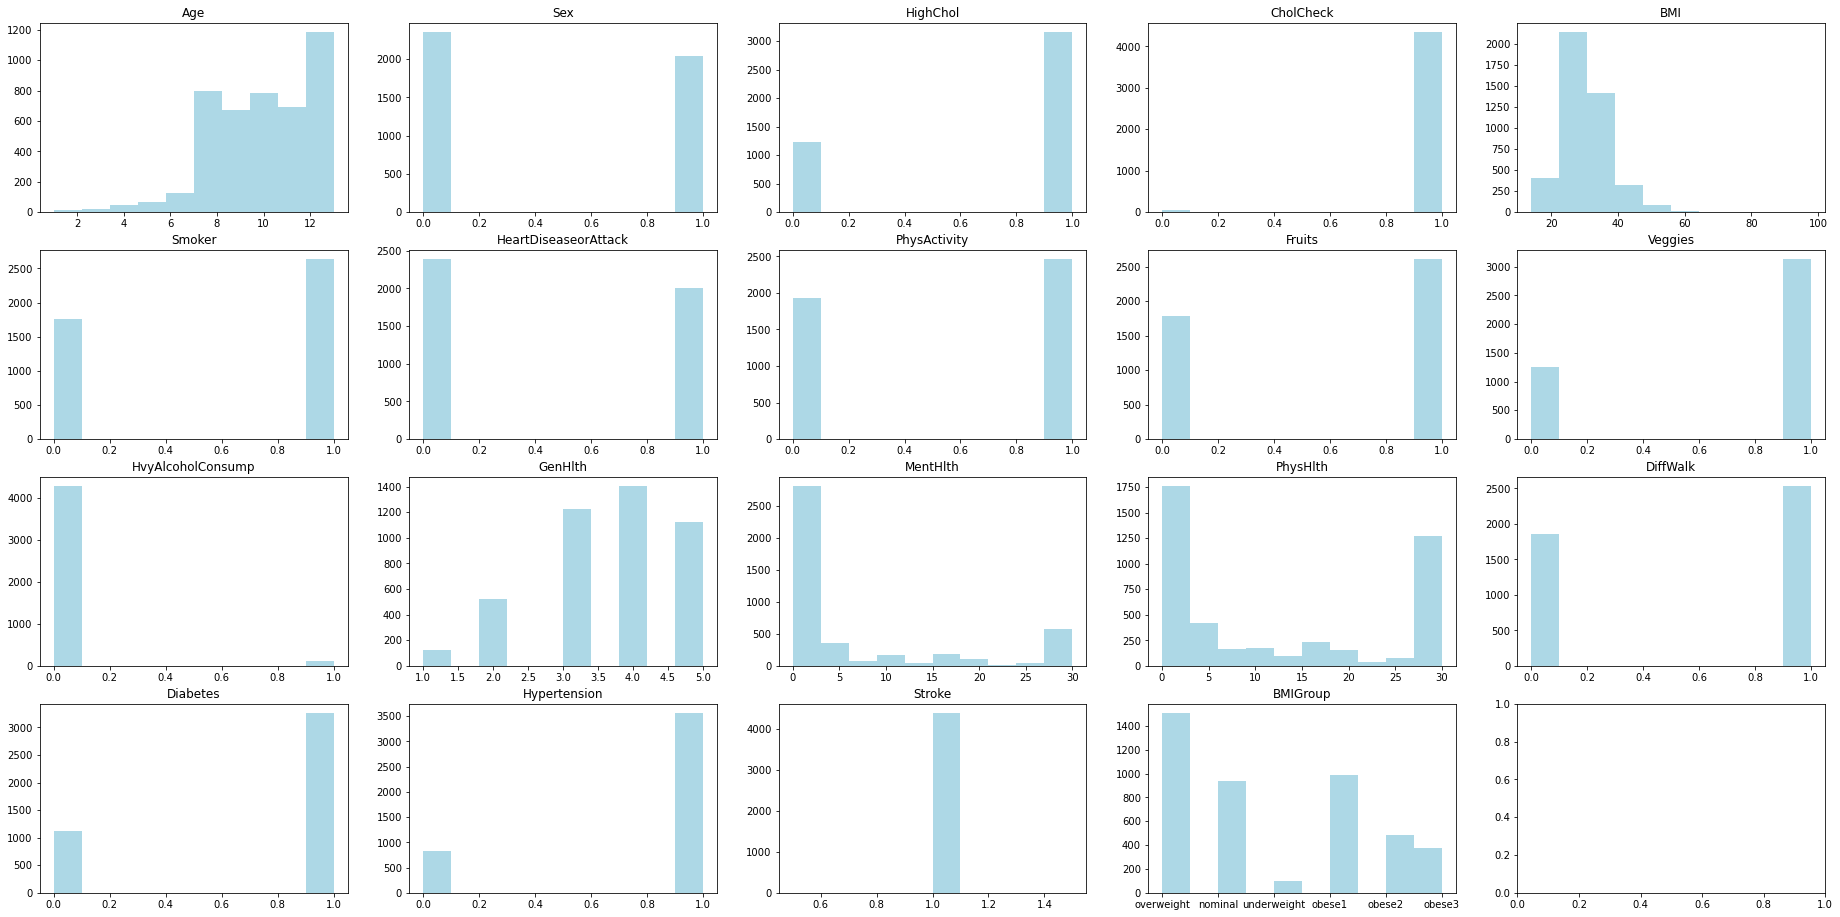

In [31]:
fig, axs = plt.subplots(4, 5, figsize=(32,16))
axs = axs.flatten()
for idx, col in enumerate(data):
    axs[idx].hist(data[data['Stroke'] == True][col], color='lightblue')
    axs[idx].set_title(f'{col}')
# fig.savefig('images/Death_Event_Distributions.png')

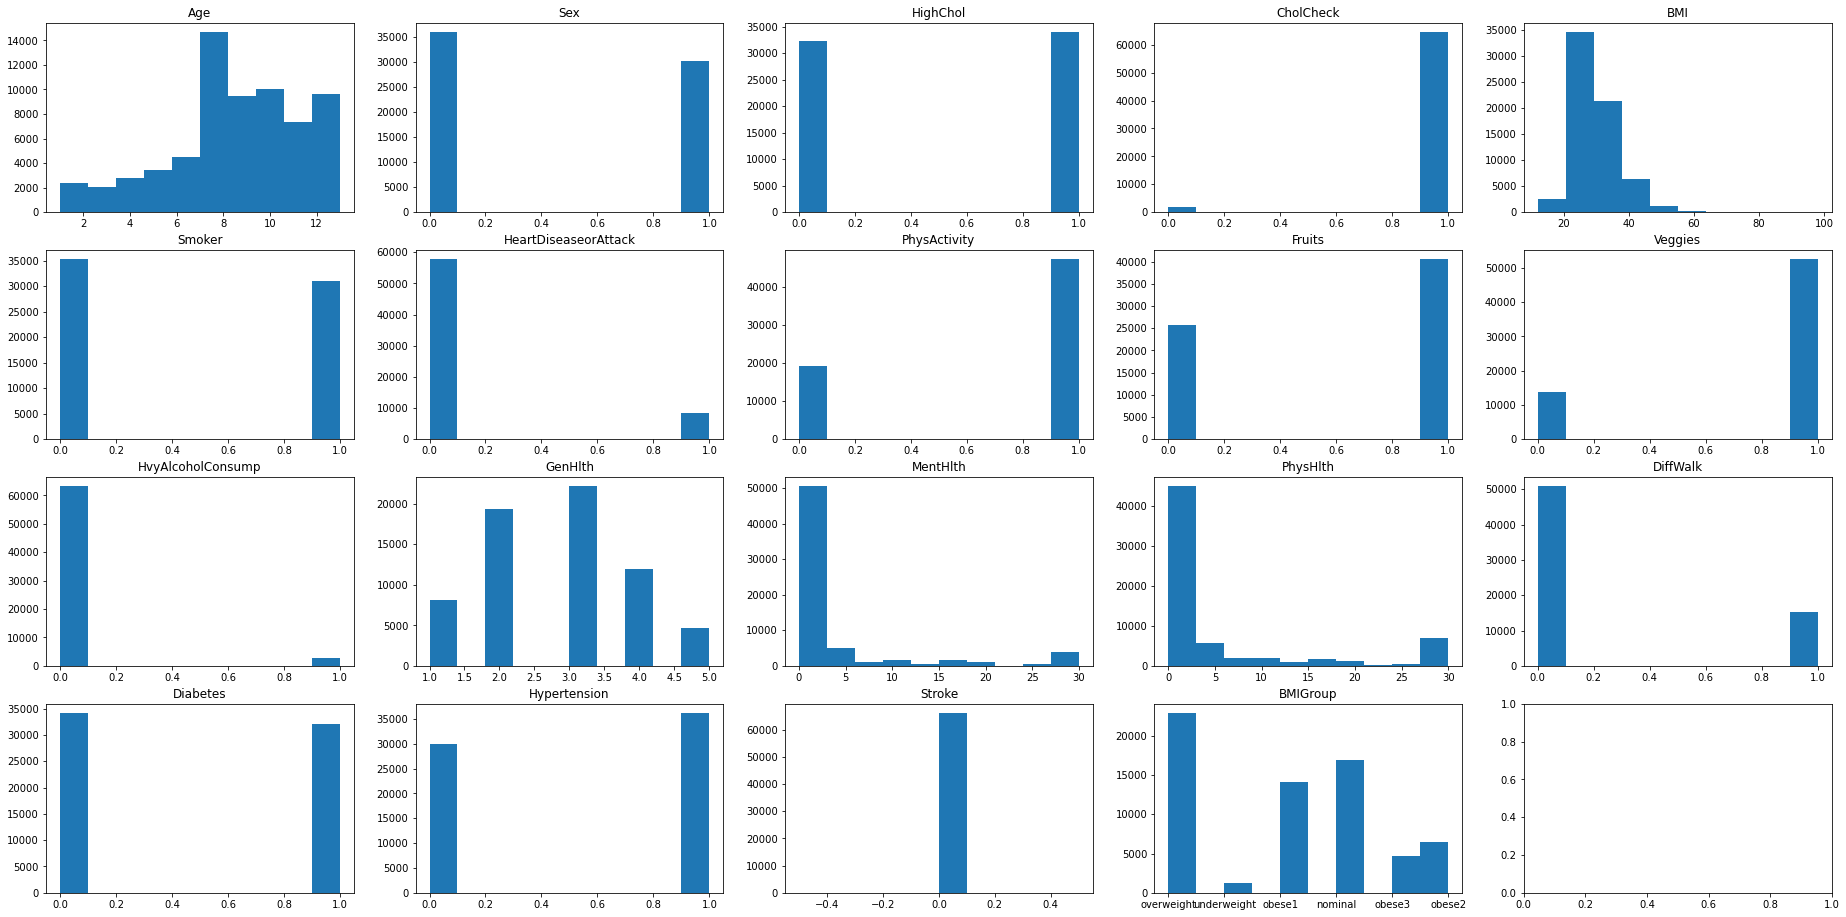

In [32]:
fig, axs = plt.subplots(4, 5, figsize=(32,16))
axs = axs.flatten()
for idx, col in enumerate(data):
    axs[idx].hist(data[data['Stroke'] == False][col])
    axs[idx].set_title(f'{col}')
# fig.savefig('images/Death_Event_Distributions.png')

In [33]:
_ = data.groupby(['BMIGroup', 'Stroke']).agg('count')
_ = _.query('Stroke == True').div(_.groupby('BMIGroup').sum()).iloc[:, 0]


In [34]:
def plot_trend(group):
    _ = data.groupby([group, 'Stroke']).agg('count')
    _ = _.query('Stroke == True').div(_.groupby(group).sum()).iloc[:, 0]
    fig = plt.figure(figsize=(12,8))
    plt.plot(_.reset_index()[group], _.reset_index().iloc[:, 2])
    plt.title(f'{group}')
    plt.show()
    return fig

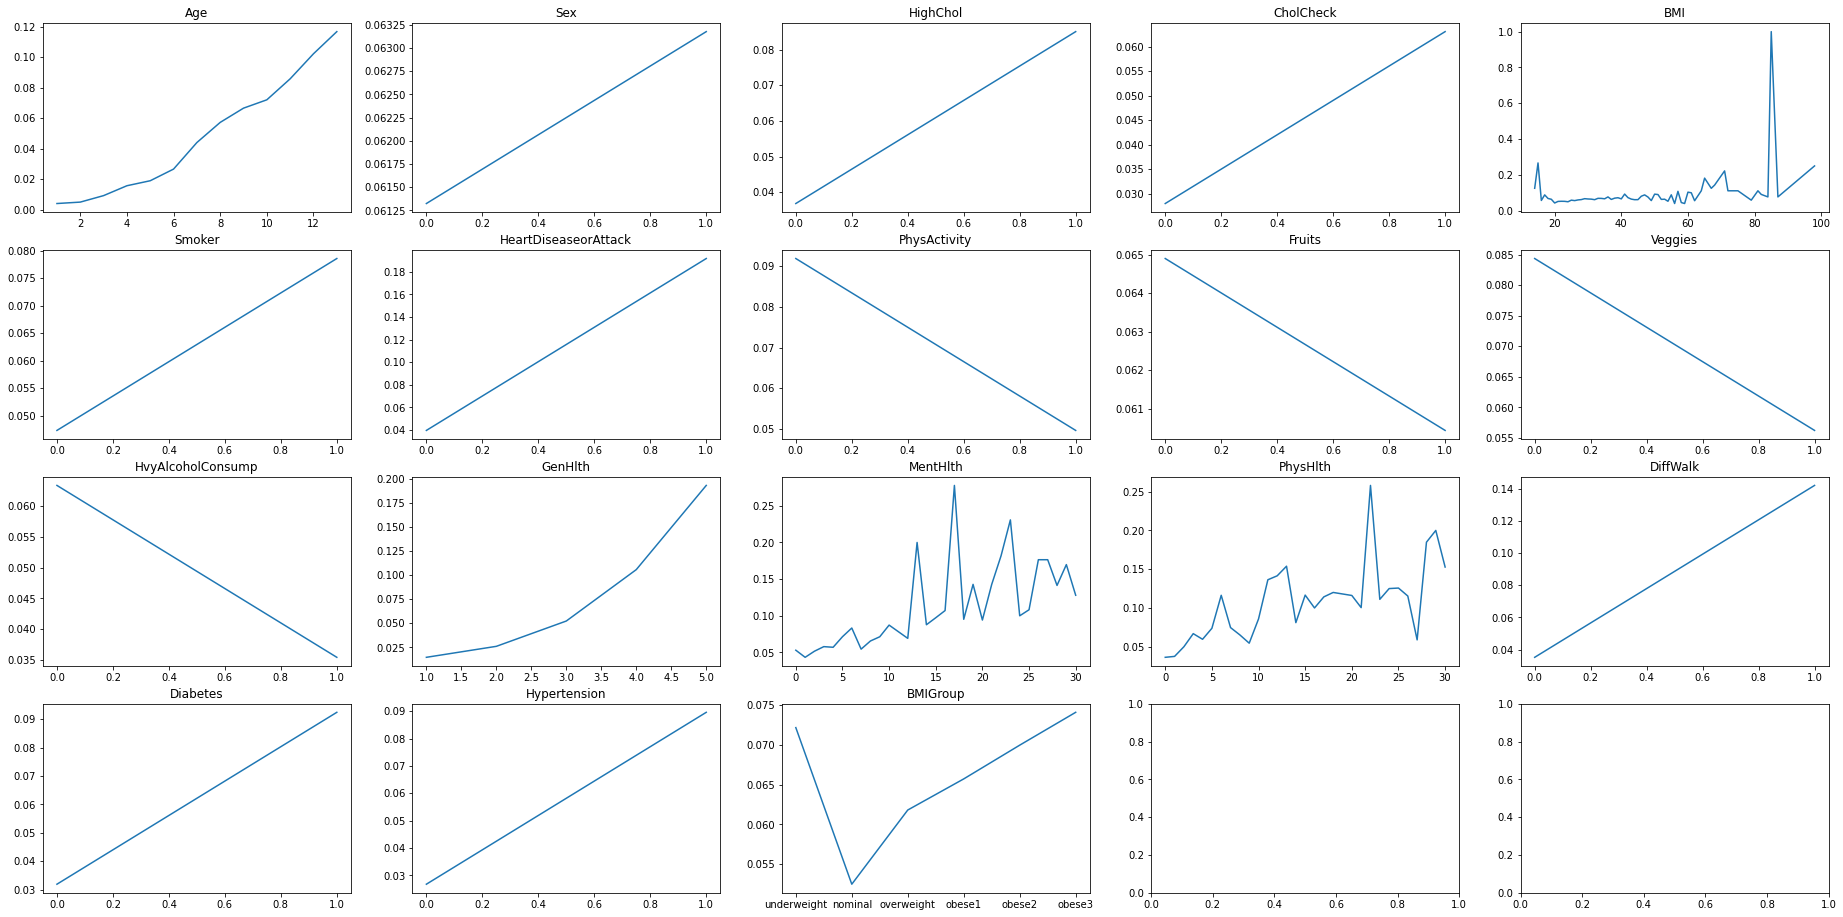

In [35]:
fig, axs = plt.subplots(4, 5, figsize=(32,16))
axs = axs.flatten()
for idx, col in enumerate(data.drop('Stroke', axis=1)):
    _ = data.groupby([col, 'Stroke']).agg('count')
    _ = _.query('Stroke == True').div(_.groupby(col).sum()).iloc[:, 0]
    axs[idx].plot(_.reset_index()[col], _.reset_index().iloc[:, 2])
    axs[idx].set_title(f'{col}')